In [1]:
import pandas as pd
import plotly.express as px

## Import Data

In [2]:
dataset = pd.read_csv("../dataset/sem_text_rel_ranked.csv")
display(dataset)

Index   SourceID      SubsetID            PairID  \
0         0  Formality  Formality_pp  Formality_pp_222   
1         1        STS           STS           STS_237   
2         2    ParaNMT    ParaNMT_pp    ParaNMT_pp_204   
3         3  Formality  Formality_pp  Formality_pp_119   
4         4  Formality  Formality_pp  Formality_pp_174   
...     ...        ...           ...               ...   
5495   5495       SNLI          SNLI           SNLI_74   
5496   5496  Goodreads     Goodreads     Goodreads_210   
5497   5497  Goodreads     Goodreads     Goodreads_287   
5498   5498       SNLI          SNLI          SNLI_697   
5499   5499  Formality   Formality_r   Formality_r_386   

                                                   Text  Score  
0     It that happens, just pull the plug.\nif that ...    1.0  
1     A black dog running through water.\nA black do...    1.0  
2     I've been searchingthe entire abbey for you.\n...    1.0  
3     If he is good looking and has a good personali...    1.0  
4     She does not hate you, she is just annoyed wit...    1.0  
...                                                 ...    ...  
5495  A young boy pounding on an anvil.\nWoman sits ...    0.0  
5496  I love how he recognized his wife tempered his...    0.0  
5497  I actually read a chapter or two beyond that p...    0.0  
5498  A boy gives being in the snow two thumbs up.\n...    0.0  
5499  Perhaps it is strange to think about sex const...    0.0  

[5500 rows x 6 columns]

## Analysis

In [3]:
df = dataset[["Text", "Score"]]
df = pd.concat((df, pd.DataFrame([{"Text1":ele[0], "Text2":ele[1]} for ele in df.Text.str.split("\n").values])), axis=1)[["Text1", "Text2", "Score"]]
display(df)

Text1  \
0                  It that happens, just pull the plug.   
1                    A black dog running through water.   
2          I've been searchingthe entire abbey for you.   
3     If he is good looking and has a good personali...   
4     She does not hate you, she is just annoyed wit...   
...                                                 ...   
5495                  A young boy pounding on an anvil.   
5496  I love how he recognized his wife tempered his...   
5497  I actually read a chapter or two beyond that p...   
5498       A boy gives being in the snow two thumbs up.   
5499  Perhaps it is strange to think about sex const...   

                                                  Text2  Score  
0             if that ever happens, just pull the plug.    1.0  
1            A black dog is running through some water.    1.0  
2               I'm looking for you all over the abbey.    1.0  
3     If he's good looking, and a good personality, ...    1.0  
4            She doesn't hate you, she is just annoyed.    1.0  
...                                                 ...    ...  
5495     Woman sits on the curb talking on a cellphone.    0.0  
5496  Torpedo Ink is Viktor's Band of Brothers, the ...    0.0  
5497     Lets say she's a blend of two types of beings.    0.0  
5498  A satisfied cat is perched beside a crystal lamp.    0.0  
5499      Few people know how to shoot pool these days.    0.0  

[5500 rows x 3 columns]

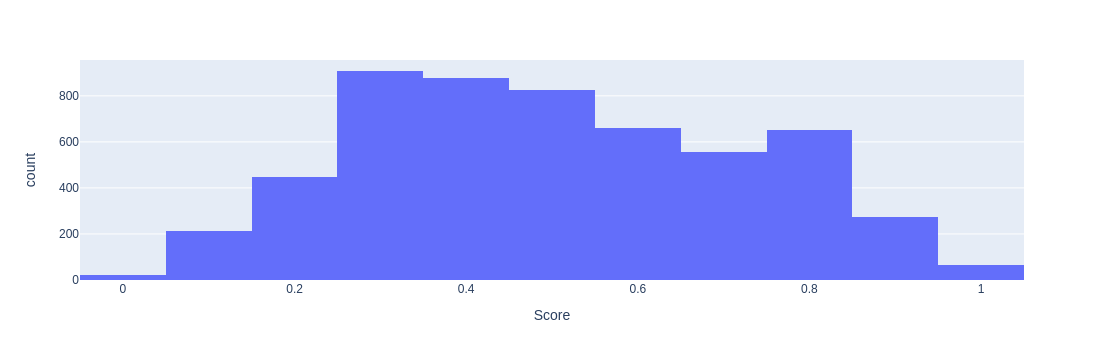

In [4]:
fig = px.histogram(df, x="Score", nbins=20)
fig.show()

## Load the Base model

In [5]:
import scipy
from transformers import BertTokenizer, BertModel

In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

## Get the texts and check the cosine similarity of their embeddings

### Bert Base Uncased

In [23]:
def compute_similarity_bert_base_uncased_mean(row_data):
    text1, text2 = row_data["Text1"], row_data["Text2"]

    text1_encoded = tokenizer(text1, return_tensors='pt')
    text2_encoded = tokenizer(text2, return_tensors='pt')
    text1_embedding = model(**text1_encoded).last_hidden_state.mean(axis=1).detach().numpy()[0]
    text2_embedding = model(**text2_encoded).last_hidden_state.mean(axis=1).detach().numpy()[0]

    return 1-scipy.spatial.distance.cosine(text1_embedding, text2_embedding)

In [14]:
df["bert_base_uncased_mean"] = df.apply(lambda ele: compute_similarity_bert_base_uncased_mean(ele), axis=1)

In [28]:
df

Text1  \
0                  It that happens, just pull the plug.   
1                    A black dog running through water.   
2          I've been searchingthe entire abbey for you.   
3     If he is good looking and has a good personali...   
4     She does not hate you, she is just annoyed wit...   
...                                                 ...   
5495                  A young boy pounding on an anvil.   
5496  I love how he recognized his wife tempered his...   
5497  I actually read a chapter or two beyond that p...   
5498       A boy gives being in the snow two thumbs up.   
5499  Perhaps it is strange to think about sex const...   

                                                  Text2  Score  \
0             if that ever happens, just pull the plug.    1.0   
1            A black dog is running through some water.    1.0   
2               I'm looking for you all over the abbey.    1.0   
3     If he's good looking, and a good personality, ...    1.0   
4            She doesn't hate you, she is just annoyed.    1.0   
...                                                 ...    ...   
5495     Woman sits on the curb talking on a cellphone.    0.0   
5496  Torpedo Ink is Viktor's Band of Brothers, the ...    0.0   
5497     Lets say she's a blend of two types of beings.    0.0   
5498  A satisfied cat is perched beside a crystal lamp.    0.0   
5499      Few people know how to shoot pool these days.    0.0   

      bert_base_uncased_mean  
0                   0.813567  
1                   0.875632  
2                   0.814567  
3                   0.898265  
4                   0.959944  
...                      ...  
5495                0.705091  
5496                0.629372  
5497                0.604095  
5498                0.608988  
5499                0.705335  

[5500 rows x 4 columns]

array([[<Axes: xlabel='Score', ylabel='Score'>,
        <Axes: xlabel='bert_base_uncased_mean', ylabel='Score'>],
       [<Axes: xlabel='Score', ylabel='bert_base_uncased_mean'>,
        <Axes: xlabel='bert_base_uncased_mean', ylabel='bert_base_uncased_mean'>]],
      dtype=object)

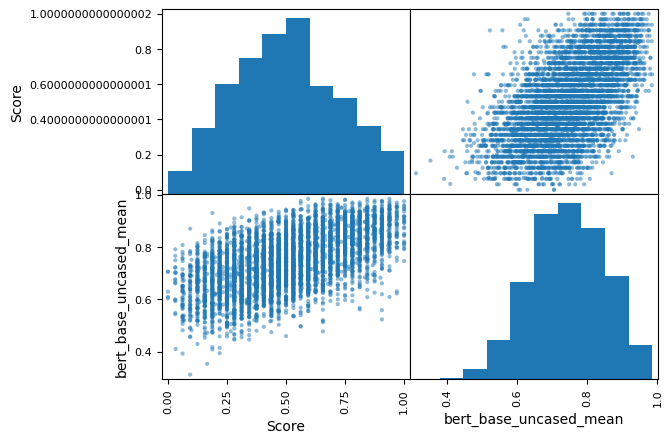

In [64]:
pd.plotting.scatter_matrix(df[["Score", "bert_base_uncased_mean"]])

In [65]:
pd.DataFrame.corr(df[["Score", "bert_base_uncased_mean"]], method="spearman")["bert_base_uncased_mean"]["Score"]

0.5780742929803433

### Bert Base Uncased model is giving a correlation of 0.58

### sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2

In [39]:
!pip install -U sentence-transformers

In [66]:
from sentence_transformers import SentenceTransformer

In [42]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

In [46]:
def compute_similarity_paraphrase_multilingual_miniLM(row_data):
    text1, text2 = row_data["Text1"], row_data["Text2"]

    text1_embedding, text2_embedding = model.encode([text1, text2])
    return 1-scipy.spatial.distance.cosine(text1_embedding, text2_embedding)

In [50]:
df["paraphrase_multilingual_minilm_mean"] = df.apply(lambda ele: compute_similarity_paraphrase_multilingual_miniLM(ele), axis=1)

array([[<Axes: xlabel='Score', ylabel='Score'>,
        <Axes: xlabel='paraphrase_multilingual_minilm_mean', ylabel='Score'>],
       [<Axes: xlabel='Score', ylabel='paraphrase_multilingual_minilm_mean'>,
        <Axes: xlabel='paraphrase_multilingual_minilm_mean', ylabel='paraphrase_multilingual_minilm_mean'>]],
      dtype=object)

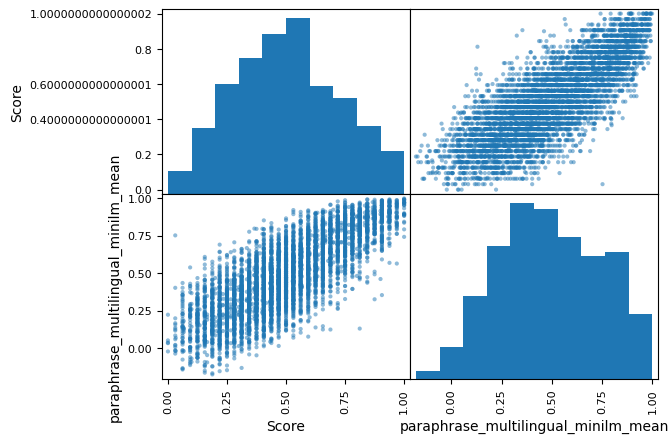

In [67]:
pd.plotting.scatter_matrix(df[["Score", "paraphrase_multilingual_minilm_mean"]])

In [73]:
pd.DataFrame.corr(df[["Score", "paraphrase_multilingual_minilm_mean"]], method="spearman")["paraphrase_multilingual_minilm_mean"]["Score"]

0.8024428108998799

### Paraphrase Multilingual MiniLM model is giving a correlation of 0.80

### sentence-transformers/LaBSE

In [76]:
model_labse = SentenceTransformer('sentence-transformers/LaBSE')

In [78]:
def compute_similarity_labse(row_data):
    text1, text2 = row_data["Text1"], row_data["Text2"]

    text1_embedding, text2_embedding = model_labse.encode([text1, text2])
    return 1-scipy.spatial.distance.cosine(text1_embedding, text2_embedding)

In [79]:
df["labse_mean"] = df.apply(lambda ele: compute_similarity_labse(ele), axis=1)

array([[<Axes: xlabel='Score', ylabel='Score'>,
        <Axes: xlabel='labse_mean', ylabel='Score'>],
       [<Axes: xlabel='Score', ylabel='labse_mean'>,
        <Axes: xlabel='labse_mean', ylabel='labse_mean'>]], dtype=object)

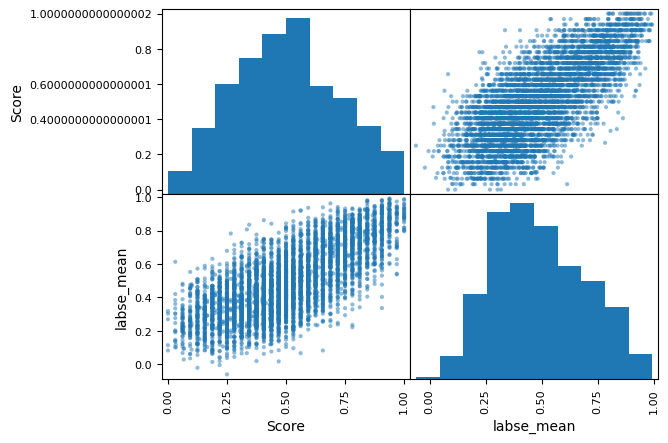

In [80]:
pd.plotting.scatter_matrix(df[["Score", "labse_mean"]])

In [81]:
pd.DataFrame.corr(df[["Score", "labse_mean"]], method="spearman")["labse_mean"]["Score"]

0.7222393125886636

### LaBSE model is giving a correlation of 0.72

### intfloat/multilingual-e5-large

In [9]:
from sentence_transformers import SentenceTransformer

model_e5 = SentenceTransformer("intfloat/multilingual-e5-large", device="cuda")

In [10]:
count = 0

In [11]:
def compute_similarity_e5(row_data):

    global count
    
    count += 1
    print(count)
    text1, text2 = row_data["Text1"], row_data["Text2"]

    text1_embedding, text2_embedding = model_e5.encode([
        f"query: {text1}", f"query: {text2}"])

    # text1_embedding, text2_embedding = model_e5.encode([text1, text2])

    return 1-scipy.spatial.distance.cosine(text1_embedding, text2_embedding)

In [12]:
df["e5_mean"] = df.apply(lambda ele: compute_similarity_e5(ele), axis=1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


array([[<Axes: xlabel='Score', ylabel='Score'>,
        <Axes: xlabel='e5_mean', ylabel='Score'>],
       [<Axes: xlabel='Score', ylabel='e5_mean'>,
        <Axes: xlabel='e5_mean', ylabel='e5_mean'>]], dtype=object)

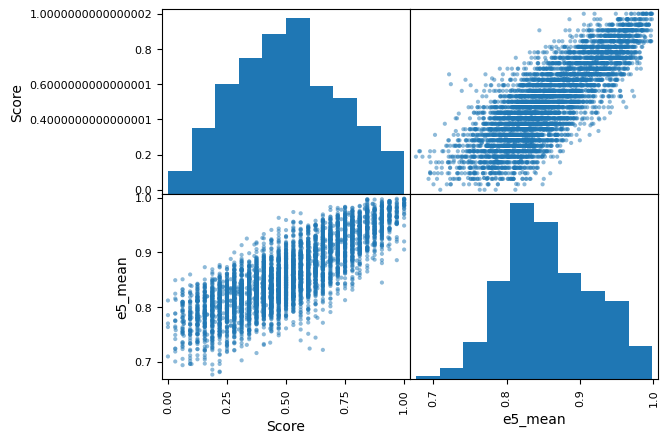

In [13]:
pd.plotting.scatter_matrix(df[["Score", "e5_mean"]])

In [14]:
pd.DataFrame.corr(df[["Score", "e5_mean"]], method="spearman")["e5_mean"]["Score"]

0.8123811886053299

### Multilingual E5 Large Model is giving a correlation of 0.81